In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
df = pd.read_parquet('data/yellow_tripdata_2023-01.parquet')

In [3]:
df.info() #Q1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [4]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df['duration'] = df['duration'].dt.total_seconds()/60
df.duration.std() #Q2

42.594351241920904

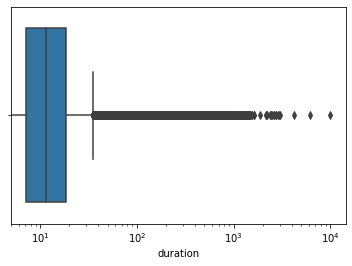

0.9812202822125979


In [5]:
sns.boxplot(data=df, x='duration')
plt.xscale('log')
plt.show()

print(df[(df['duration']>=1) & (df['duration']<=60)].shape[0]/df.shape[0]) #Q3
df = df[(df['duration']>=1) & (df['duration']<=60)]

In [6]:
categorical = ['PULocationID', 'DOLocationID']
df[categorical] = df[categorical].astype(str)

dv=DictVectorizer()
train_dict = df[categorical].to_dict(orient='records') # first convert to list of dicts (each row = one dict)
X_train=dv.fit_transform(train_dict)
X_train.shape #Q4


(3009173, 515)

In [7]:
y_train = df['duration']

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse) #Q5

7.649261027919939

In [8]:
def preprocess(filename):

    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df['duration'] = df['duration'].dt.total_seconds()/60

    df = df[(df['duration']>=1) & (df['duration']<=60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)

    return df

df = preprocess('data/yellow_tripdata_2023-02.parquet')
categorical = ['PULocationID', 'DOLocationID']
val_dict = df[categorical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_val = df['duration']
y_pred = lr.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
np.sqrt(mse) #Q6

7.811832638273232